# **Import the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Load Data**

In [0]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/ANZ_Virtual_Internship/ANZ synthesised transaction dataset.xlsx")
df.to_csv("/content/drive/My Drive/Colab Notebooks/ANZ_Virtual_Internship/ANZ synthesised transaction dataset.csv", sep=",")

In [0]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [0]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [0]:
df.shape

(12043, 23)

In [0]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [0]:
print(df['status'].unique())
print(df['bpay_biller_code'].unique())
print(df['txn_description'].unique())
print(df['movement'].unique())

['authorized' 'posted']
[nan 0 ' THE DISCOUNT CHEMIST GROUP'
 ' LAND WATER & PLANNING East Melbourne']
['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
['debit' 'credit']


In [0]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

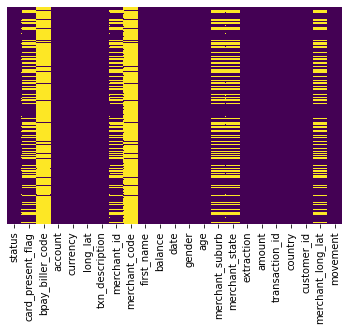

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Converting gender column to 0's and 1's**

In [0]:
df['gender'] = pd.get_dummies(df['gender'],drop_first=True)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01', '2018-08-01', '2018-08-01',
               '2018-08-01', '2018-08-01',
               ...
               '2018-10-31', '2018-10-31', '2018-10-31', '2018-10-31',
               '2018-10-31', '2018-10-31', '2018-10-31', '2018-10-31',
               '2018-10-31', '2018-10-31'],
              dtype='datetime64[ns]', name='date', length=12043, freq=None)

**Extracting day and month from the date column**


In [0]:
df['month'] = df.index.month
df['day'] = df.index.day

In [0]:
df = df.reset_index(drop=True)

**Covert the customr_id column to int dtype**

In [8]:
numbers = []
for elements in df['customer_id']:
  spos = elements.find('-')
  numbers.append(elements[spos+1:])
  #numbers = numbers.astype('int')
print(numbers)

['2487424745', '2487424745', '2142601169', '1614226872', '2487424745', '2688605418', '4123612273', '4123612273', '3026014945', '2031327464', '2317998716', '4123612273', '3026014945', '1462656821', '3142625864', '860700529', '2370108457', '2630892467', '3716701010', '3378712515', '2487424745', '2695611575', '1669695324', '3255104878', '537508723', '2376382098', '3129499595', '883482547', '51506836', '883482547', '1614226872', '1196156254', '3378712515', '2178051368', '809013380', '809013380', '51506836', '3702001629', '127297539', '1646183815', '1614226872', '164374203', '2283904812', '3180318393', '3904958894', '537508723', '1604596597', '1617121891', '2206365095', '3255104878', '1462656821', '1617121891', '2031327464', '2599279756', '3904958894', '2031327464', '3255104878', '3117610635', '3378712515', '2178051368', '1433879684', '2500783281', '2630892467', '3026014945', '326006476', '527400765', '443776336', '2663907001', '1433879684', '2178051368', '4123612273', '3255104878', '248742

In [0]:
df['customer_id'] = numbers

In [0]:
df['customer_id'] = df['customer_id'].astype(int)

In [0]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,0,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,2487424745,153.38 -27.99,debit,8,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,0,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,2487424745,151.21 -33.87,debit,8,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,1,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,2142601169,151.21 -33.87,debit,8,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,0,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,1614226872,153.05 -26.68,debit,8,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,0,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,2487424745,153.44 -28.06,debit,8,1


**Getting the dataframe containing only the salary**

In [0]:
salary = df[df['txn_description'] == 'PAY/SALARY']

In [0]:
salary.describe()

,card_present_flag,merchant_code,balance,age,amount
count,0.0,883.0,883.000000,883.000000,883.000000
mean,NaN,0.0,16242.859049,32.631937,1898.728029
std,NaN,0.0,30953.342656,12.276731,1150.364621
min,NaN,0.0,735.660000,18.000000,576.000000
25%,NaN,0.0,4309.995000,22.000000,1013.670000
50%,NaN,0.0,7532.540000,30.000000,1626.480000
75%,NaN,0.0,14370.765000,40.000000,2538.680000
max,NaN,0.0,267128.520000,78.000000,8835.980000


In [12]:
salary.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,1,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,1462656821,NaN,credit,8,1
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,0,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,2500783281,NaN,credit,8,1
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,1,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,326006476,NaN,credit,8,1
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,1,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,1433879684,NaN,credit,8,1
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,0,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,4123612273,NaN,credit,8,1


In [0]:
salary.nunique()

status                 1
card_present_flag      0
bpay_biller_code       1
account              100
currency               1
long_lat             100
txn_description        1
merchant_id            0
merchant_code          1
first_name            80
balance              883
date                  65
gender                 2
age                   33
merchant_suburb        0
merchant_state         0
extraction           394
amount               100
transaction_id       883
country                1
customer_id          100
merchant_long_lat      0
movement               1
dtype: int64

**Removing  unwanted columns**

In [0]:
salary_drop = salary.drop(['status','card_present_flag','bpay_biller_code','currency','long_lat','txn_description','merchant_id','merchant_code','first_name','merchant_suburb','merchant_state','extraction','transaction_id','country','merchant_long_lat','movement'],axis = 1)

In [0]:
salary_drop = salary_drop.drop('account',axis = 1)

In [15]:
salary_drop.head()

,balance,gender,age,amount,customer_id,month,day
50,8342.11,1,23,3903.95,1462656821,8,1
61,2040.58,0,23,1626.48,2500783281,8,1
64,3158.51,1,22,983.36,326006476,8,1
68,2517.66,1,24,1408.08,1433879684,8,1
70,2271.79,0,43,1068.04,4123612273,8,1


# **Adding attributes**

**--------------------------------------------------------**

**Annual Salary**

In [0]:
annual_salary = salary_drop.groupby('customer_id')['amount'].sum()
annual_salary = pd.DataFrame(annual_salary)

In [0]:
annual_salary.columns = ['annual_salary']

In [23]:
annual_salary.head()

,annual_salary
customer_id,
51506836,12048.98
55310383,21277.36
72755508,8703.84
127297539,14804.27
134193016,14165.76


In [0]:
annual_salary.shape

(100, 1)

**---------------------------------------------------------**

**No. of credit transactions**

In [0]:
credit_df = df[df['movement'] == 'credit']

In [0]:
credit_df = credit_df.groupby('customer_id')['movement'].count()
credit_df = pd.DataFrame(credit_df)
credit_df.columns = ['credit_transactions']

In [26]:
credit_df.head()

,credit_transactions
customer_id,
51506836,2
55310383,13
72755508,12
127297539,13
134193016,7


**-------------------------------------------------------**

**No. of debit transactions**

In [0]:
debit_df = df[df['movement'] == 'debit']

In [0]:
debit_df = debit_df.groupby('customer_id')['movement'].count()
debit_df = pd.DataFrame(debit_df)
debit_df.columns = ['debit_transactions']

In [29]:
debit_df.head()

,debit_transactions
customer_id,
51506836,237
55310383,44
72755508,46
127297539,186
134193016,69


**-----------------------------------------------------------**

**Average balance maintained**

In [0]:
overall_average_balance = df.groupby('customer_id')['balance'].mean()

In [23]:
overall_average_balance = pd.DataFrame(overall_average_balance)
overall_average_balance.columns = ['overall_average_balance']
overall_average_balance.head()

,overall_average_balance
customer_id,
51506836,16385.831632
55310383,7031.470175
72755508,4497.557069
127297539,5448.334573
134193016,5553.929474


**-------------------------------------------------------**

**Average amount transacted**



In [0]:
overall_average_amount = df.groupby('customer_id')['amount'].mean()

In [25]:
overall_average_amount = pd.DataFrame(overall_average_amount)
overall_average_amount.columns = ['overall_average_amount']
overall_average_amount.head()

,overall_average_amount
customer_id,
51506836,100.839958
55310383,497.669474
72755508,197.213276
127297539,109.833216
134193016,226.721184


**-------------------------------------------------------**

**Average card present flag**

In [0]:
overall_average_card = df.groupby('customer_id')['card_present_flag'].mean()

In [27]:
overall_average_card = pd.DataFrame(overall_average_card)
overall_average_card.columns = ['overall_average_card']
overall_average_card.head()

,overall_average_card
customer_id,
51506836,0.831683
55310383,0.735294
72755508,0.866667
127297539,0.824675
134193016,0.740741


**-------------------------------------------------------**

**Amount spent by each customer**

In [0]:
payment = df[(df['txn_description'] == 'POS') | (df['txn_description'] == 'SALES-POS')]

In [30]:
payment.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,0,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,2487424745,153.38 -27.99,debit,8,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,0,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,2487424745,151.21 -33.87,debit,8,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,1,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,2142601169,151.21 -33.87,debit,8,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,0,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,1614226872,153.05 -26.68,debit,8,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,0,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,2487424745,153.44 -28.06,debit,8,1


In [0]:
amount_spent = payment.groupby('customer_id')['amount'].sum()

In [30]:
amount_spent = pd.DataFrame(amount_spent)
amount_spent.columns = ['amount_spent']
amount_spent.head()

,amount_spent
customer_id,
51506836,5719.77
55310383,2152.80
72755508,1554.53
127297539,4576.54
134193016,939.05


**-------------------------------------------------------**

**Annual savings of each customer**

In [0]:
savings = annual_salary['annual_salary'] - amount_spent['amount_spent']

In [32]:
savings = pd.DataFrame(savings)
savings.columns = ['total_savings']
savings.head()

,total_savings
customer_id,
51506836,6329.21
55310383,19124.56
72755508,7149.31
127297539,10227.73
134193016,13226.71


**-------------------------------------------------------**

**Highest amount transacted by each customer**

In [0]:
high_amount = df.groupby('customer_id')['amount'].max()

In [34]:
high_amount = pd.DataFrame(high_amount)
high_amount.columns = ['highest_amount_transacted']
high_amount.head()

,highest_amount_transacted
customer_id,
51506836,6024.49
55310383,1852.00
72755508,1180.00
127297539,1138.79
134193016,2023.68


# **Merging everything**

In [0]:
attributes_merged = pd.concat([annual_salary,credit_df,debit_df,overall_average_balance,overall_average_amount,overall_average_card,amount_spent,savings,high_amount],axis=1)

In [44]:
attributes_merged.head()

,annual_salary,credit_transactions,debit_transactions,overall_average_balance,overall_average_amount,overall_average_card,amount_spent,total_savings,highest_amount_transacted
customer_id,,,,,,,,,
51506836,12048.98,2,237,16385.831632,100.839958,0.831683,5719.77,6329.21,6024.49
55310383,21277.36,13,44,7031.470175,497.669474,0.735294,2152.80,19124.56,1852.00
72755508,8703.84,12,46,4497.557069,197.213276,0.866667,1554.53,7149.31,1180.00
127297539,14804.27,13,186,5448.334573,109.833216,0.824675,4576.54,10227.73,1138.79
134193016,14165.76,7,69,5553.929474,226.721184,0.740741,939.05,13226.71,2023.68


In [45]:
attributes_merged.shape

(100, 9)

In [0]:
df_new = pd.merge(left = salary_drop,right = attributes_merged,on='customer_id')

In [66]:
df_new.head()

,balance,gender,age,amount,customer_id,month,day,annual_salary,credit_transactions,debit_transactions,overall_average_balance,overall_average_amount,overall_average_card,amount_spent,total_savings,highest_amount_transacted
0,8342.11,1,23,3903.95,1462656821,8,1,27327.65,7,109,13368.370517,297.510345,0.828125,3215.55,24112.1,3903.95
1,10724.87,1,23,3903.95,1462656821,8,15,27327.65,7,109,13368.370517,297.510345,0.828125,3215.55,24112.1,3903.95
2,13030.74,1,23,3903.95,1462656821,8,29,27327.65,7,109,13368.370517,297.510345,0.828125,3215.55,24112.1,3903.95
3,15523.69,1,23,3903.95,1462656821,9,12,27327.65,7,109,13368.370517,297.510345,0.828125,3215.55,24112.1,3903.95
4,17906.31,1,23,3903.95,1462656821,9,26,27327.65,7,109,13368.370517,297.510345,0.828125,3215.55,24112.1,3903.95


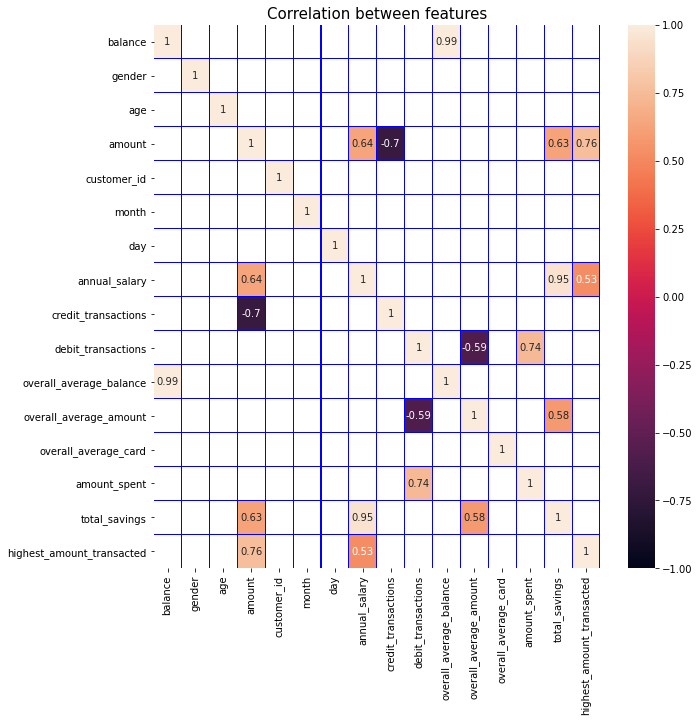

In [47]:
correlation=df_new.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.yticks(rotation=0)
plt.show()

From the above chart we see that balance is highly correlated with overall_average_balance and amount column is correlated with majority of the columns hence we can remove amount and balance.

The annual_salary column is correlated with the total_savings, highest_amount_transacted and amount columns.

# **Visualizing the correlation**

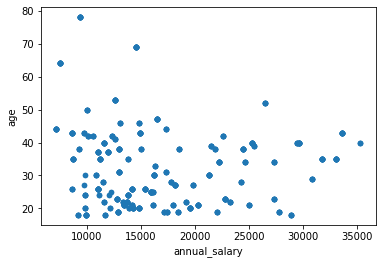

<Figure size 1440x1440 with 0 Axes>

In [62]:
df_new.plot.scatter(x='annual_salary',y='age')
plt.figure(figsize=(20, 20))
plt.show()

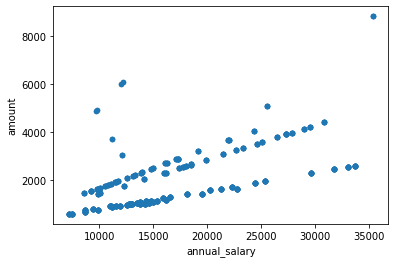

<Figure size 1440x1440 with 0 Axes>

In [37]:
df_new.plot.scatter(x='annual_salary',y='amount')
plt.figure(figsize=(20, 20))
plt.show()

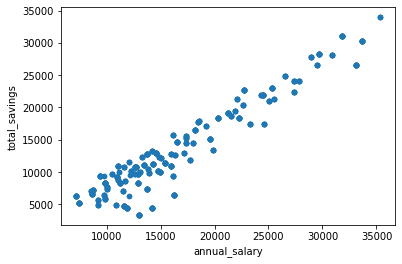

In [57]:
df_new.plot.scatter(x='annual_salary',y='total_savings')
plt.show()

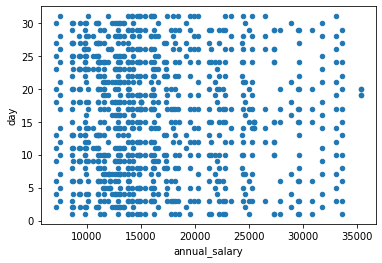

In [58]:
df_new.plot.scatter(x='annual_salary',y='day')
plt.show()

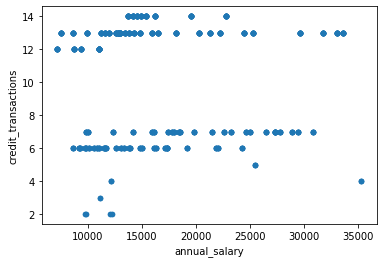

In [63]:
df_new.plot.scatter(x='annual_salary',y='credit_transactions')
plt.show()

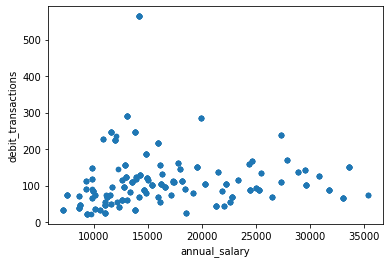

In [64]:
df_new.plot.scatter(x='annual_salary',y='debit_transactions')
plt.show()

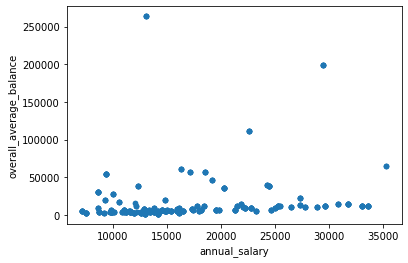

In [65]:
df_new.plot.scatter(x='annual_salary',y='overall_average_balance')
plt.show()

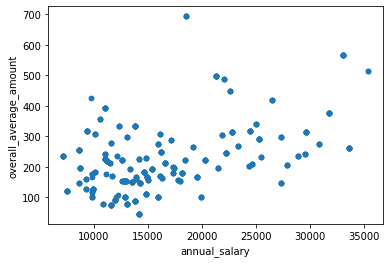

In [68]:
df_new.plot.scatter(x='annual_salary',y='overall_average_amount')
plt.show()

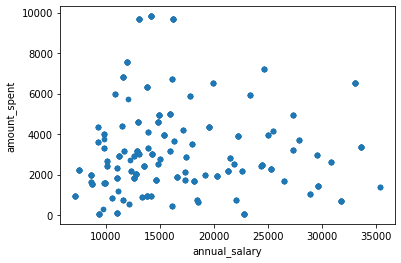

In [67]:
df_new.plot.scatter(x='annual_salary',y='amount_spent')
plt.show()

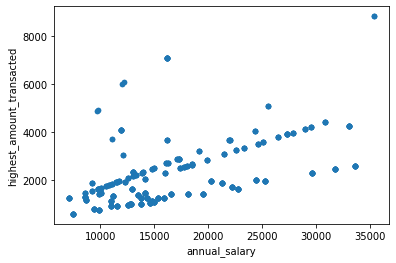

In [69]:
df_new.plot.scatter(x='annual_salary',y='highest_amount_transacted')
plt.show()

# **Spliting into test and train**

In [0]:
target = df_new['annual_salary']
df_new_drop = df_new.drop(['annual_salary','balance','amount'],axis = 1)

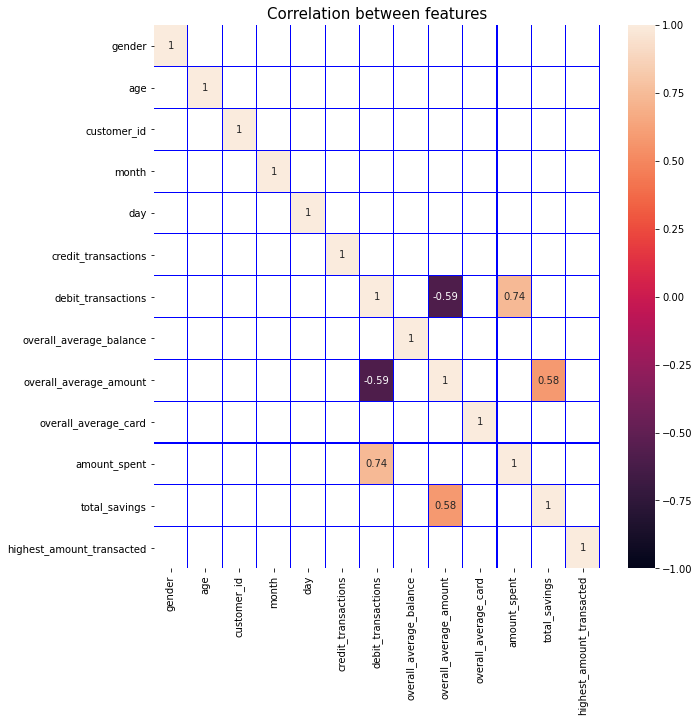

In [49]:
correlation=df_new_drop.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.5)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.yticks(rotation=0)
plt.show()

After removing balance and amount column we get columns that are still correlated with other columns. But their correlation value is less hence we can keep those

In [50]:
from sklearn.model_selection import train_test_split
x_train1,x_test1, y_train1, y_test1 = train_test_split(df_new_drop, target, test_size = 0.30, random_state=0)
print("x_train ",x_train1.shape)
print("x_test ",x_test1.shape)
print("y_train ",y_train1.shape)
print("y_test ",y_test1.shape)

x_train  (618, 13)
x_test  (265, 13)
y_train  (618,)
y_test  (265,)


# **Linear Regression**

In [225]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS (Ordinary Least Squares)
model1 = sm.OLS(y_train1, x_train1).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          annual_salary   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.019e+23
Date:                Tue, 05 May 2020   Prob (F-statistic):                        0.00
Time:                        09:37:45   Log-Likelihood:                          8582.1
No. Observations:                 618   AIC:                                 -1.714e+04
Df Residuals:                     605   BIC:                                 -1.708e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
gender                     1.137e-12   1.93e-08   5.89e-05      1.000   -3.79e-08    3.79e-08
age                        1.887e-13   7.98e-10      0.000      1.000   -1.57e-09    1.57e-09
customer_id               -9.949e-17   8.33e-18    -11.945      0.000   -1.16e-16   -8.31e-17
month                     -1.686e-12   8.78e-09     -0.000      1.000   -1.72e-08    1.72e-08
day                         7.55e-14   1.04e-09   7.27e-05      1.000   -2.04e-09    2.04e-09
credit_transactions         6.04e-14   3.71e-09   1.63e-05      1.000   -7.29e-09    7.29e-09
debit_transactions         8.216e-15   2.13e-10   3.85e-05      1.000   -4.19e-10    4.19e-10
overall_average_balance     3.71e-16   3.39e-13      0.001      0.999   -6.66e-13    6.67e-13
overall_average_amount     7.494e-15   1.26e-10   5.94e-05      1.000   -2.48e-10    2.48e-10
overall_average_card       3.212e-12      1e-07    3.2e-05      1.000   -1.97e-07    1.97e-07
amount_sent                   1.0000   9.07e-12    1.1e+11      0.000       1.000       1.000
total_savings                 1.0000   2.16e-12   4.63e+11      0.000       1.000       1.000
highest_amount_transacted -1.048e-15    1.3e-11  -8.05e-05      1.000   -2.56e-11    2.56e-11
==============================================================================
Omnibus:                      149.225   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.677
Skew:                          -0.051   Prob(JB):                     9.77e-07
Kurtosis:                       1.968   Cond. No.                     2.49e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
def rmse(predictions, targets):
    differences = predictions - targets                     #the Differences
    differences_squared = differences ** 2                  # the Squares of ^
    mean_of_differences_squared = differences_squared.mean()   #The Mean of ^
    rmse_val = np.sqrt(mean_of_differences_squared)         # Root of ^
    return rmse_val

In [0]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)

#Predicting the model on Test Data
predictions1 = model1.predict(x_test1)

In [228]:
tmp1 = pd.Series({'Model': "Linear Regression Model",
                  'R-Squared Value': model1.rsquared,
                  'Adj.R-Squared Value': model1.rsquared_adj,
                  'RMSE': rmse(predictions1, y_test1)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Linear Regression Model,1.0,1.0,2.256137e-07


In [229]:
prediction=model1.predict(x_test1)
pd.DataFrame({'Actual':y_test1,'Predection':prediction}).head()

,Actual,Predection
584,31762.12,31762.12
678,16542.11,16542.11
728,12609.06,12609.06
338,19881.05,19881.05
570,28925.61,28925.61


# **Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(x_train1, y_train1)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
decision_prediction=decision_tree_reg.predict(x_test1)

In [235]:
#decision_prediction=model1.predict(x_test1)
pd.DataFrame({'Actual':y_test1,'Predection':decision_prediction}).head()

,Actual,Predection
584,31762.12,31762.12
678,16542.11,16542.11
728,12609.06,12609.06
338,19881.05,19881.05
570,28925.61,28925.61


In [0]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
mse = mean_squared_error(y_test1,decision_prediction)

In [0]:
rmse = np.sqrt(mse)

In [234]:
rmse

55.706979427905914

When we applied linear regression, we got an rmse of 2.256137e-07. After applying decision tree the rmse became 55.7